Yanxin Luo

Q1

We know that $P(Y=k|X=x) \propto p_k(x)\pi_k$ where $p_k(x)=\frac{1}{\sqrt{2\pi}\sigma_k}e^{-(x-\mu_k)^2/2\sigma^2_k}$.

Thus, $\max P(Y=k|X=x) \Leftrightarrow \max p_k(x)$ given $\pi_k $ and equivalent $\sigma_k=\sigma $ .

Take log function of $p_k(x)$, we get $Log(p_k(x))=Log(\frac{1}{\sqrt{2\pi}\sigma})-(x-\mu_k)^2/2\sigma^2$

$Log(p_k(x))=-Log(\sqrt{2\pi}\sigma)-(x^2+\mu_k^2-2x\mu_k)/2\sigma^2$

$Log(p_k(x))=x\frac{\mu_k}{\sigma^2}-\frac{\mu^2_k}{2\sigma^2}+Log(\pi_k)+c=\delta_k(x)+c$, where $c=-Log(\sqrt{2\pi}-\frac{x^2}{2\sigma^2})$

Proved.

Q2

$\max P(Y=k|X=x) \Leftrightarrow \max p_k(x)$ given $\pi_k  $ .

$Log(p_k(x))=Log(\frac{1}{\sqrt{2\pi}\sigma_k})-(x-\mu_k)^2/2\sigma^2_k$

$Log(p_k(x))=-Log(\sqrt{2\pi}\sigma_k)-(x^2+\mu_k^2-2x\mu_k)/2\sigma^2_k=-\frac{x^2}{2\sigma^2_k}-\frac{\mu^2_k}{2\sigma^2_k}+\frac{x\mu_k}{\sigma^2_k}-Log(\sigma_k)+c=\delta_k(x)+c$

Let $\delta_s(x)=\delta_t(x)$, we could find that quadratic term $x^2$ can not be eliminated since $\mu_s \neq \mu_t$.

Thus, the classifier is nonlinear.

Q3 (a)


QDA is better on the training set while LDA is better on the testing set.

Q3 (b)

QDA is better both on the training set and the testing set.

Q3 (d)

False.

Q4 


$p_k(X) = 
\frac{\pi_k \frac{1}{\sqrt{2\pi\sigma}} \exp \left( -\frac{1}{2\sigma^2} (x - \mu_k)^2 \right)}
{\sum_{l=1}^{k} \pi_l \frac{1}{\sqrt{2\pi\sigma}} \exp \left( -\frac{1}{2\sigma^2} (x - \mu_l)^2 \right)}$

Here, $\pi_{YES} = 0.8$, $\pi_{NO} = 0.2 $, $\mu_{YES} = 10$, $ \mu_{NO} = 0$, $\hat{\sigma^2} = 36$ ,

In [34]:
from scipy.stats import norm

mu_yes, mu_no = 10, 0 
sigma = 6 
x_value=4

f_yes_4 = norm.pdf(x_value, loc=mu_yes, scale=sigma)
f_no_4 = norm.pdf(x_value, loc=mu_no, scale=sigma)
print(f"f_YES(4) = {f_yes_4:.8f}")
print(f"f_NO(4) = {f_no_4:.8f}")

f_YES(4) = 0.04032845
f_NO(4) = 0.05324133


$p_{YES}(4)=\frac{0.8* 0.04032845}{0.2*0.05324133+0.8*0.04032845} \approx 0.75186$

Q5 (a)

$\delta_k(x)=x\frac{\mu_1-\mu_2}{\sigma^2}-\frac{\mu^2_1-\mu^2_2}{2\sigma^2}$

Let $\delta_1(x)=\delta_2(x)$, $x=\frac{\mu_1+\mu_2}{2}$,

$c=\frac{-1+3}{2}=1$



Q5 (b)

$\delta_k(x)=x\frac{\mu_1-\mu_2}{\sigma^2}-\frac{\mu^2_1-\mu^2_2}{2\sigma^2}-Log(\frac{\pi_1}{\pi_2})$

Since $\pi_1=0.4$ and $\pi_2=0.6$, $Log(\frac{\pi_1}{\pi_2})<0$, then $\hat{c}<c$ in (a).

Thus, the new boundary $\hat{c}$ is less than 1.

Q5 (c)

In [35]:
import numpy as np

mu1, mu2 = -1, 3  
sigma2 = 1
pi1, pi2 = 0.4, 0.6 
new_c = (mu1 + mu2) / 2 - (sigma2 / (mu1 - mu2)) * np.log(pi1 / pi2)
print(new_c)

0.898633722972959


Q5 (d)

Since they have different variance, QDA is better.

Q5 (e)

In [36]:
import sympy as sp

x = sp.Symbol('x')
sigma1_sq = 0.25  
sigma2_sq = 1.5  
mu1 = -1        
mu2 = 3         

eq = (x**2 * (1/sigma2_sq- 1/sigma1_sq)- 2*x * (mu2/sigma2_sq- mu1/sigma1_sq)
      + (mu2**2/sigma2_sq- mu1**2/sigma1_sq)+2*sp.log(sp.sqrt(sigma2_sq) /sp.sqrt(sigma1_sq)))

decision= sp.solve(eq, x)
print(f"When x<{decision[0]}, Y=1.")
print(f"When {decision[0]}x<{decision[1]}, Y=2.")
print(f"When x>{decision[1]}, Y=1.")

When x<-3.89225424859610, Y=1.
When -3.89225424859610x<0.292254248596096, Y=2.
When x>0.292254248596096, Y=1.


Q6 (a)

In [37]:
import pandas as pd
market=pd.read_csv("./dataset/smarket.csv")
market.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,624.500000,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,360.988227,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,0.000000,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,312.250000,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,624.500000,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,936.750000,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,1249.000000,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [38]:
market_filter=market[market['Year'].isin([2001, 2002, 2003, 2004])]
Y_train=market_filter["Direction"]
X_train=market_filter.loc[:,["Lag1","Lag2"]]

In [39]:
market_filter_test=market[market['Year'].isin([2005])]
Y_test=market_filter_test["Direction"]
X_test=market_filter_test.loc[:,["Lag1","Lag2"]]

Q6 (b)

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
Y_pred = lda.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(Y_test, Y_pred)
print("Overall Accuracy: {:.8f}".format(accuracy))

Confusion Matrix:
 [[ 35  76]
 [ 35 106]]
Overall Accuracy: 0.55952381


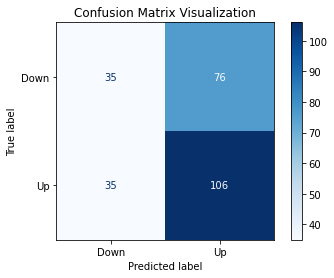

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lda.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Visualization")
plt.show()

Q6 (c)

In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train)
Y_pred = qda.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)
accuracy = accuracy_score(Y_test, Y_pred)
print("Overall Accuracy: {:.4f}".format(accuracy))

Confusion Matrix:
 [[ 30  81]
 [ 20 121]]
Overall Accuracy: 0.5992


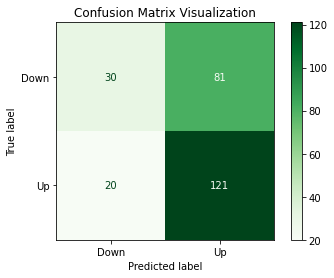

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lda.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix Visualization")
plt.show()

Q7 (a)

In [44]:
cars=pd.read_csv("./dataset/auto.csv")
cars=cars.iloc[: , 1:]
cars["mpg01"] = (cars["mpg"] > 25).astype(int)
print(cars.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  mpg01  
0       1  chevrolet chevelle malibu      0  
1       1          buick skylark 320      0  
2       1         plymouth satellite      0  
3       1              amc rebel sst      0  
4       1                ford torino      0  


Q7 (b)

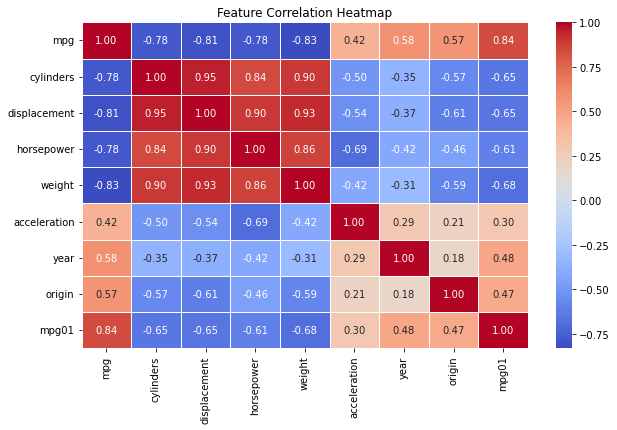

In [45]:
cars = cars.drop(columns=["name"])

plt.figure(figsize=(10, 6))
corr_matrix = cars.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

From correlation heatmap, we conclude that cylinder, displacement, horsepower and weight are four quantitative features.

Q7 (c)

In [46]:
from sklearn.model_selection import train_test_split

X = cars.drop(columns=["mpg01"]) 
y = cars["mpg01"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123, stratify=y)

print(f"The number of samples in the training set where mpg01=1 is {(y_train == 1).sum()}.")

The number of samples in the training set where mpg01=1 is 125.


Q7 (d)

In [47]:
selected_features = ["weight", "horsepower", "displacement", "cylinders"]
X = cars[selected_features] 
y = cars["mpg01"] 

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_selected, y_train)

y_train_pred_lda= lda.predict(X_train_selected)
y_test_pred_lda= lda.predict(X_test_selected)

train_misclass_rate_lda = 1 - accuracy_score(y_train, y_train_pred_lda)
test_misclass_rate_lda = 1 - accuracy_score(y_test, y_test_pred_lda)

print(f"Misclassification rate of LDA on training set is {train_misclass_rate_lda}.")
print(f"Misclassification rate of LDA on testing set is {test_misclass_rate_lda}.")

Misclassification rate of LDA on training set is 0.14696485623003197.
Misclassification rate of LDA on testing set is 0.20253164556962022.


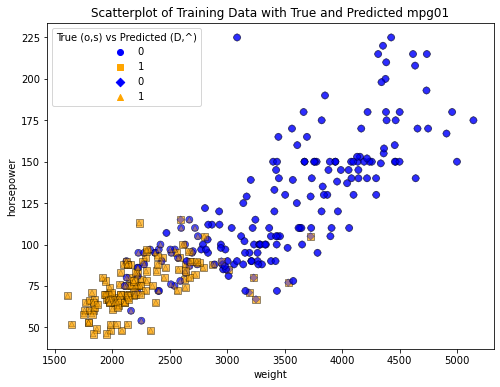

In [49]:
import matplotlib.pyplot as plt

feature_x = "weight"
feature_y = "horsepower"

plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_train_selected[feature_x], y=X_train_selected[feature_y],
                hue=y_train, style=y_train, palette={0: "blue", 1: "orange"},
                markers={0: "o", 1: "s"}, edgecolor="black", alpha=0.7, s=50) 

sns.scatterplot(x=X_train_selected[feature_x], y=X_train_selected[feature_y],
                hue=y_train_pred_lda, style=y_train_pred_lda, palette={0: "blue", 1: "orange"},
                markers={0: "D", 1: "^"}, edgecolor="black", alpha=0.4, s=30)  

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Scatterplot of Training Data with True and Predicted mpg01")
plt.legend(title="True (o,s) vs Predicted (D,^)")
plt.show()

Q7 (e)

In [50]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_selected, y_train)

y_train_pred_qda=qda.predict(X_train_selected)
y_test_pred_qda=qda.predict(X_test_selected)

train_misclass_rate_qda = 1-accuracy_score(y_train, y_train_pred_qda)
test_misclass_rate_qda= 1-accuracy_score(y_test, y_test_pred_qda)

print(f"Misclassification rate of QDA on training set is {train_misclass_rate_qda}.")
print(f"Misclassification rate of QDA on testing set is {test_misclass_rate_qda}.")

Misclassification rate of QDA on training set is 0.13738019169329074.
Misclassification rate of QDA on testing set is 0.17721518987341767.


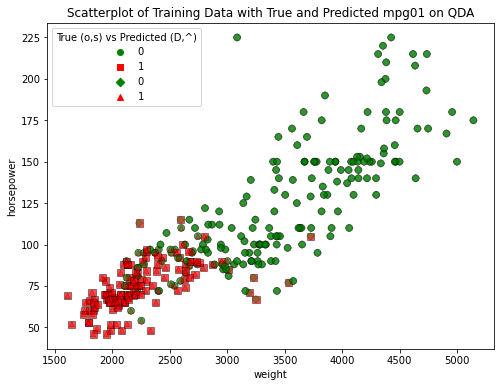

In [51]:
feature_x = "weight"
feature_y = "horsepower"

plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_train_selected[feature_x], y=X_train_selected[feature_y],
                hue=y_train, style=y_train, palette={0: "green", 1: "red"},
                markers={0: "o", 1: "s"}, edgecolor="black", alpha=0.7, s=50) 

sns.scatterplot(x=X_train_selected[feature_x], y=X_train_selected[feature_y],
                hue=y_train_pred_qda, style=y_train_pred_qda, palette={0: "green", 1: "red"},
                markers={0: "D", 1: "^"}, edgecolor="black", alpha=0.4, s=30) 

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Scatterplot of Training Data with True and Predicted mpg01 on QDA")
plt.legend(title="True (o,s) vs Predicted (D,^)")
plt.show()

Q7 (f)

 LDA and QDA have the same test misclassification rate. This result suggests that the dataset does not strongly require modeling separate covariances, and LDA's assumption of equal covariances is reasonable.

Q7 (g)

In [52]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_selected, y_train)

y_train_pred_log = log_reg.predict(X_train_selected)
y_test_pred_log = log_reg.predict(X_test_selected)

train_misclass_rate_log = 1 - accuracy_score(y_train, y_train_pred_log)
test_misclass_rate_log = 1 - accuracy_score(y_test, y_test_pred_log)

print(f"Misclassification rate of Logistic on training set is {train_misclass_rate_log}.")
print(f"Misclassification rate of Logistic on testing set is {test_misclass_rate_log}.")

Misclassification rate of Logistic on training set is 0.12140575079872207.
Misclassification rate of Logistic on testing set is 0.15189873417721522.


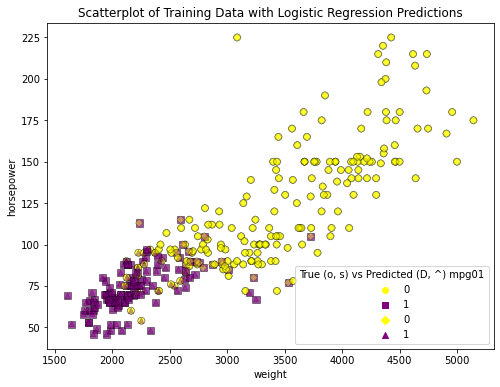

In [53]:
feature_x = "weight"
feature_y = "horsepower"

plt.figure(figsize=(8,6))

sns.scatterplot(x=X_train_selected[feature_x], y=X_train_selected[feature_y],
                hue=y_train, style=y_train, palette={0: "yellow", 1: "purple"},
                markers={0: "o", 1: "s"}, edgecolor="black", alpha=0.7, s=50)

sns.scatterplot(x=X_train_selected[feature_x], y=X_train_selected[feature_y],
                hue=y_train_pred_log, style=y_train_pred_log, palette={0: "yellow", 1: "purple"},
                markers={0: "D", 1: "^"}, edgecolor="black", alpha=0.4, s=30)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Scatterplot of Training Data with Logistic Regression Predictions")
plt.legend(title="True (o, s) vs Predicted (D, ^) mpg01")
plt.show()

Q7 (h)

In [54]:
median_values = X_train_selected.median().values.reshape(1, -1)
probability_mpg_above_25 = log_reg.predict_proba(median_values)[:, 1][0]

print("Estimated probability that mpg > 25 (mpg01 = 1) of logistics model is {:.8f}".format(probability_mpg_above_25))

Estimated probability that mpg > 25 (mpg01 = 1) of logistics model is 0.37370272


E:\ana\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Q7 (i)

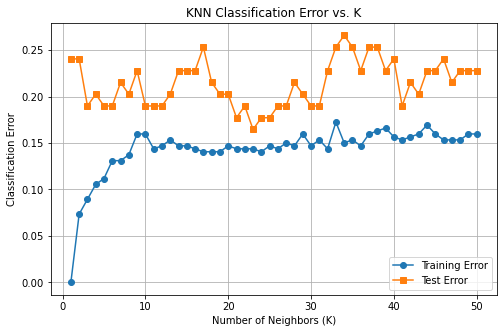

Optimal K based on test error: 23


In [55]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

K_values = np.arange(1, 51)
train_errors=[]
test_errors=[]

for K in K_values:
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train_selected, y_train)
    
    y_train_pred = knn.predict(X_train_selected)
    y_test_pred = knn.predict(X_test_selected)
    
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))


plt.figure(figsize=(8, 5))
plt.plot(K_values, train_errors, label="Training Error", marker='o')
plt.plot(K_values, test_errors, label="Test Error", marker='s')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Classification Error")
plt.title("KNN Classification Error vs. K")
plt.legend()
plt.grid()
plt.show()

optimal_K = K_values[np.argmin(test_errors)]
print(f"Optimal K based on test error: {optimal_K}")

Q7 (j)

In [56]:
# K=23
knn_best = KNeighborsClassifier(n_neighbors=optimal_K)

knn_best.fit(X_train_selected, y_train)

y_train_pred_knn = knn_best.predict(X_train_selected)
y_test_pred_knn = knn_best.predict(X_test_selected)

train_misclass_rate_knn = 1 - accuracy_score(y_train, y_train_pred_knn)
test_misclass_rate_knn = 1 - accuracy_score(y_test, y_test_pred_knn)

print(f"Training Misclassification Rate: {train_misclass_rate_knn}")
print(f"Test Misclassification Rate: {test_misclass_rate_knn}")

Training Misclassification Rate: 0.1437699680511182
Test Misclassification Rate: 0.16455696202531644


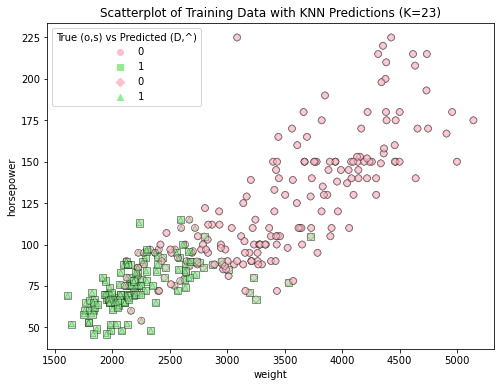

In [57]:
feature_x = "weight"
feature_y = "horsepower"

plt.figure(figsize=(8,6))

sns.scatterplot(x=X_train_selected[feature_x], y=X_train_selected[feature_y],
                hue=y_train, style=y_train, palette={0: "pink", 1: "lightgreen"},
                markers={0: "o", 1: "s"}, edgecolor="black", alpha=0.7, s=50)

sns.scatterplot(x=X_train_selected[feature_x], y=X_train_selected[feature_y],
                hue=y_train_pred_knn, style=y_train_pred_knn, palette={0: "pink", 1: "lightgreen"},
                markers={0: "D", 1: "^"}, edgecolor="black", alpha=0.4, s=30)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Scatterplot of Training Data with KNN Predictions (K={optimal_K})")
plt.legend(title="True (o,s) vs Predicted (D,^)")
plt.show()

Q7 (k)

In [58]:
median_values = X_train_selected.median().values.reshape(1, -1)
probability_mpg_above_25 =knn_best.predict_proba(median_values)[:, 1][0]

print("Estimated probability that mpg > 25 (mpg01 = 1) of KNN is {:.8f}".format(probability_mpg_above_25))

Estimated probability that mpg > 25 (mpg01 = 1) of KNN is 0.39130435


E:\ana\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Q7 (l)

My choice is logistic regression due to its performance on this dataset.
1. Logistic regression performed the best (~0.1518 test misclassification rate), suggesting a mostly linear decision boundary.
2. LDA and QDA had similar performance (~0.1772) that indicates similar covariances for both classes.
3. KNN was comparable (~0.1645) so class boundary is not highly non-linear.